<a href="https://colab.research.google.com/github/emresolaaksu/EnerjiSA_1.Odev/blob/main/Enerjisa_data_1_%C3%B6dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd

1-) Pandas kütüphanesiyle bir DataFrame oluşturup ve içine Levels of Measurements'ları nominal, ordinal, interval ve ratio olan kolonlar ekleyelim.

In [26]:
data = {'Nominal(Cinsiyet)': ['Erkek','Kadın'], 'Ordinal(Hissedilen Ağrı)': ["Hafif","Ağır"],'Interval(Vücut Sıcaklığı)': [20, 30], 'Ratio(Boy)': [1.90,1.75]}  
df = pd.DataFrame(data)

In [27]:
df

,Nominal(Cinsiyet),Ordinal(Hissedilen Ağrı),Interval(Vücut Sıcaklığı),Ratio(Boy)
0,Erkek,Hafif,20,1.90
1,Kadın,Ağır,30,1.75


2-) Ekli data üzerindeki aşağıda yer alan kolonların count, mean, std, min, 25%, 50%, 75%, max değerlerini ve IQR metoduyla outlier kalan veri sayısını çıkartıp, bu değerleri sözel ve karşılaştırmalı olarak yorumlayalım. 

In [28]:
df_new = pd.read_csv("data.csv",usecols=['radius_mean', 'area_mean','compactness_mean'])
described = df_new.describe()
described

,radius_mean,area_mean,compactness_mean
count,569.000000,569.000000,569.000000
mean,14.127292,654.889104,0.104341
std,3.524049,351.914129,0.052813
min,6.981000,143.500000,0.019380
25%,11.700000,420.300000,0.064920
50%,13.370000,551.100000,0.092630
75%,15.780000,782.700000,0.130400
max,28.110000,2501.000000,0.345400


In [29]:
#2. Soruda istenen yüzdelik veriler üst tarafta gözüküyor şimdi IQR methodu ile outlier verilerini gösterme zamanı

In [30]:
Q1_radius_mean = described.radius_mean[4]
Q3_radius_mean = described.radius_mean[6]

IQR_radius_mean = Q3_radius_mean - Q1_radius_mean
low_radius_mean = Q1_radius_mean - (1.5 * IQR_radius_mean)
print(low_radius_mean)
high_radius_mean = Q3_radius_mean + (1.5 * IQR_radius_mean)
print(high_radius_mean)

Q1_area_mean = described.area_mean[4]
Q3_area_mean = described.area_mean[6]

IQR_area_mean = Q3_area_mean - Q1_area_mean
low_area_mean = Q1_area_mean - (1.5 * IQR_area_mean)
print(low_area_mean,"negatif alan :)")
high_area_mean = Q3_area_mean + (1.5 * IQR_area_mean)
print(high_area_mean)

Q1_compactness_mean = described.compactness_mean[4]
Q3_compactness_mean = described.compactness_mean[6]

IQR_compactness_mean = Q3_compactness_mean - Q1_compactness_mean
low_compactness_mean = Q1_compactness_mean - (1.5 * IQR_compactness_mean)
print(low_compactness_mean,"negatif büyüklük değerleri :)")
high_compactness_mean = Q3_compactness_mean + (1.5 * IQR_compactness_mean)
print(high_compactness_mean)

5.579999999999999
21.9
-123.30000000000001 negatif alan :)
1326.3000000000002
-0.03329999999999997 negatif büyüklük değerleri :)
0.22861999999999996


In [31]:
print("Outliers for radius_mean are", df_new[(df_new.radius_mean < low_radius_mean) | (df_new.radius_mean > high_radius_mean)].radius_mean.values)
print(len(df_new[(df_new.radius_mean < low_radius_mean) | (df_new.radius_mean > high_radius_mean)].radius_mean.values))

Outliers for radius_mean are [25.22 22.27 24.25 23.27 27.22 23.29 28.11 23.21 23.51 25.73 22.01 27.42
 23.09 24.63]
14


In [32]:
print("Outliers for area_mean are", df_new[(df_new.area_mean < low_area_mean) | (df_new.area_mean > high_area_mean)].area_mean.values)
print(len(df_new[(df_new.area_mean < low_area_mean) | (df_new.area_mean > high_area_mean)].area_mean.values))

Outliers for area_mean are [1404. 1878. 1509. 1761. 1686. 2250. 1685. 2499. 1670. 1364. 1419. 1491.
 1747. 2010. 1546. 1482. 1386. 1335. 1407. 1384. 2501. 1682. 1841. 1347.
 1479.]
25


In [33]:
print("Outliers for compactness_mean are", df_new[(df_new.compactness_mean < low_compactness_mean) | (df_new.compactness_mean > high_compactness_mean)].compactness_mean.values)
print(len(df_new[(df_new.compactness_mean < low_compactness_mean) | (df_new.compactness_mean > high_compactness_mean)].compactness_mean.values))

Outliers for compactness_mean are [0.2776 0.2839 0.2396 0.2458 0.2293 0.3454 0.2665 0.2768 0.2867 0.2832
 0.2413 0.3114 0.2364 0.2363 0.2576 0.277 ]
16


En fazla outlier area_mean verisinde gözüküyor ayrıca area_mean ve compactness_mean verilerinin lower boundları negatif ancak bu veriler bir büyüklük gösterdikleri için asla negatif olamazlar başka bir değişle compactness_mean ve area_mean verilerinin hesaplanmış lower boundları çok da bir anlam ifade etmemektedirler. Veriler incelendiğinde radius_mean için de lower bound ın altında olan bir outlier verisi gözükmemektedir yani bütün bu 3 kolun için outlierların hepsi upper bound üzerindedir.

3-) Ekli data üzerindeki aşağıda yer alan kolonların birbirleriyle olan korelasyonlarını, covaryanslarını, Pearson Correlation Coefficientlarını, Spearman Rank Coefficientlarını ve Effect Size'larını bularak sözel ve karşılaştırmalı olarak yorumlayalım.

In [34]:
PeCorrelation_df = df_new.corr(method='pearson')
PeCorrelation_df
#Normal korelasyon ile pearson korelasyonu aynıdır o yüzden ayrı bir kod yazmıyorum 

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.987357,0.506124
area_mean,0.987357,1.000000,0.498502
compactness_mean,0.506124,0.498502,1.000000


In [35]:
SpCorrelation_df = df_new.corr(method='spearman')
SpCorrelation_df

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.999602,0.497578
area_mean,0.999602,1.000000,0.488988
compactness_mean,0.497578,0.488988,1.000000


Üstte de gözüktüğü gibi radius ve area değerlerinin ortalamaları birbirlerine çok yüksek bir katsayı ile pozitif korele bunun nedeni aslında bu 2 değerin birbirlerine nedensel açıdan bağlı olmasıdır yarıçapı artan cisimlerin alanlar da artar 

In [36]:
Covariance_df = df_new.cov()
Covariance_df

,radius_mean,area_mean,compactness_mean
radius_mean,12.418920,1224.483409,0.094197
area_mean,1224.483409,123843.554318,9.264931
compactness_mean,0.094197,9.264931,0.002789


In [ ]:
#Effect Size Hesaplanması
#Açıkçası bunu hesaplayan bir paket olduğu için kendim ek bir kod yazmadım :D
!pip install pingouin
import pingouin as pg

In [38]:
pg.compute_effsize(df_new.area_mean, df_new.radius_mean, eftype='cohen')
# Eğer verilerin yerleri ters olsaydı effect size negatif çıkıcaktı bunun nedeni
# Bu 2 farklı verinin ortalamalarının birbirinden çok uzak olmasıdır 
# radius mean = 14.127292	area mean = 654.889104	

2.5748571535813936

In [39]:
pg.compute_effsize(df_new.area_mean, df_new.compactness_mean, eftype='cohen')
# Yine aynı şekilde verilerin ortalamaları birbirinden çok uzak olduğundan dolayı
# Effect size çok büyük çıkıyor 

2.6313393087695855

4-) Bayes Teoreminin gerçek hayatta karşımıza çıkan ve kullanılan örneklerinden 5 tane bulalım.

Bayes teoremi hakkında eğlenceli bir örnek bir çocuğun erkek veya kız olmasının paradox u için görebiliriz 2 çocuklu bir ailenin 1 çocuğu kız ise diğer çocuğunun da kız olma ihtimali nedir sorusuna cevap verirken bu teoremi kullanırsak cevap 2/3 çıkıcaktır ancak bir çocuğun kız veya erkek olma ihtimali genlerle karar verilceğinden bu ihtimal hep yüzde 50 olmalıdır https://journals.le.ac.uk/ojs1/index.php/lumj/article/view/3488

Yine ilaç sektöründe yapılan testlerin popülasyonun yüzde kaçında doğru karar verdiği konusunda da bir sürü bayes teoremi ile araştırmalar görebiliriz örnek olarak https://towardsdatascience.com/bayes-rule-with-a-simple-and-practical-example-2bce3d0f4ad0
Görüldüğü üzere yüksek bir true positive bulma oranına sahip olan bir test olsa da false positive sayısı da çok fazla bunun nedeni nufüsun fazla olması ve false positive rejection rate in %95 ile yetersiz kalmasıdır

Bayes teoremini https://obscuredinosaurfacts.com/blog/post/2021/01/27/bayes.html linkinde farklı olaylar için kullanılmış halde görebilirsiniz 

5-) Poisson, Normal , Gamma, Weilbull ve Logaritmik dağılımların benzer ve farklı yönlerini bir tablo halinde çıkaralım.(Araştırma Ödevi)

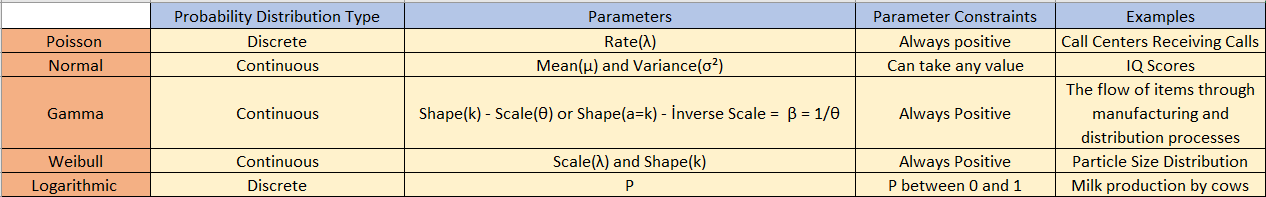